<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 (Assignment) -- Working with datasets</h2>

Authors: Brandstetter, Mitterecker, Schäfl <br>
Date: 31-10-2019

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies 
to all code within this file.

Copyright statement: <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u2_utils</code>
- <code>seaborn</code>
- <code>numpy</code>
- <code>matplotlib.pyplot</code>
- <code>sklearn.naive_bayes.GaussianNB</code>
- <code>sklearn.ensemble.RandomForestClassifier</code>
- <code>xgboost</code>
- <code>sklearn.model_selection.train_test_split</code>
- <code>sklearn.neighbors.KNeighborsClassifier</code>
- <code>sklearn.datasets</code>
- <code>pandas</code>

In [1]:
import u2_utils as u2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import DMatrix, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Afterwards, check if the <code>numpy</code> module was correctly imported, by computed the <i>arithmetic mean</i> of <code>[4, 3, 6]</code> and printing the result.

In [2]:
np.mean([4, 3, 6])

4.333333333333333

# Exercise 1
In this exercise, you will be working with a data set composed of various measurements of different <i>wine</i> attributes (e.g. the <i>alcohol concentration</i>). It was published/donored by <i>S. Aeberhard</i> and originally gathered by:

<cite>Forina, M. et al, PARVUS - 
An Extendible Package for Data Exploration, Classification and Correlation. 
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.</cite>

This time, we won't give you a description of the data set, as your <b>first task</b> requires you to get more familiar with it on your own. In order to achieve this, perform the following steps:

- Load the <i>wine</i> data set.
- Look at the <i>last</i> eight samples of the data set.


- ... and follow any further instructions.

In [3]:
wine = u2.load_wine()
wine[:-9:-1]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2


Now you know more about the structure and features of your data set, but depending on the <i>target</i> type, different analysis approaches need to be applied. Are you being confronted with a <i>regression</i> or a <i>classification</i> task? Maybe you can find the answer when looking at the columns of the data set.

<i>Print</i> the corresponding column name as well as the corresponding value of the $42^{nd}$ element.

In [4]:
feature_names = wine.columns[:-1]
X = wine[feature_names]

y = wine['target']
print(wine.columns[-1])

print(y[42])

target
0


As most data sets consist of samples which are described by a vast amount of features, <i>dimensionality reduction</i> techniques come in very handy. Especially for visualisation purposes, projecting samples down to <i>two</i> or <i>three</i> components is a great start on getting your hands on the data set. Talking about something is all nice, but actually doing it is quite another thing. Keep in mind, which columns should be <i>considered</i>, and which should be <i>ignored</i>.

- Choose an approach for dimensionality reduction.
- Reduce the wine data set to $d = 2$ as well as $d = 3$.
- Visualize the resulting data in a colored <i>scatter plot</i>.

In [5]:
wine_reduced_tsne_2d = u2.apply_tSNE(n_components=2, data=X)

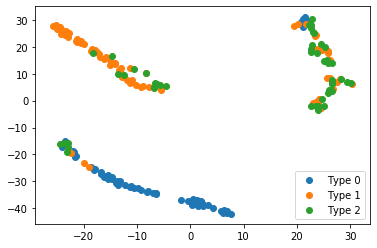

In [6]:
u2.plot_points_2d_wine(wine_reduced_tsne_2d, wine)

In [7]:
wine_reduced_tsne_3d = u2.apply_tSNE(n_components=3, data=X)

<IPython.core.display.Javascript object>


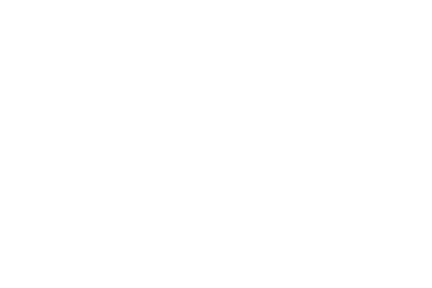

<IPython.core.display.Javascript object>


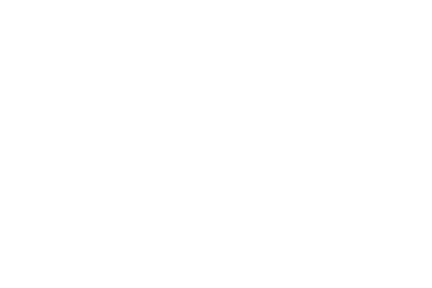

In [41]:
%matplotlib notebook
u2.plot_points_3d_wine(wine_reduced_tsne_3d, wine)

Projecting data sets down, as well as experimenting with different settings of hyperparamaters of subsequent clustering algorithms, may be a good start to get more familiar with the data set, nonetheless one hits the wall pretty fast. Moreover, we are interested in using as much useful information as possible, but dimensionality reduction techniques essentially drop <i>some</i> of the variance intrinsic to the data. Hence, it is always a good idea to look for <i>correlations</i> in the data, maybe some features <i>can</i> be dropped without losing insightful details.

Your <b>second task</b> comprises the following:

- Display and analyze possible correlations in the data using <i>all</i> features.
- Concentrate on and display correlations of the features <code>total_phenols</code>, <code>flavanoids</code> and <code>color_intensity</code>.

Do you observe some correlations?

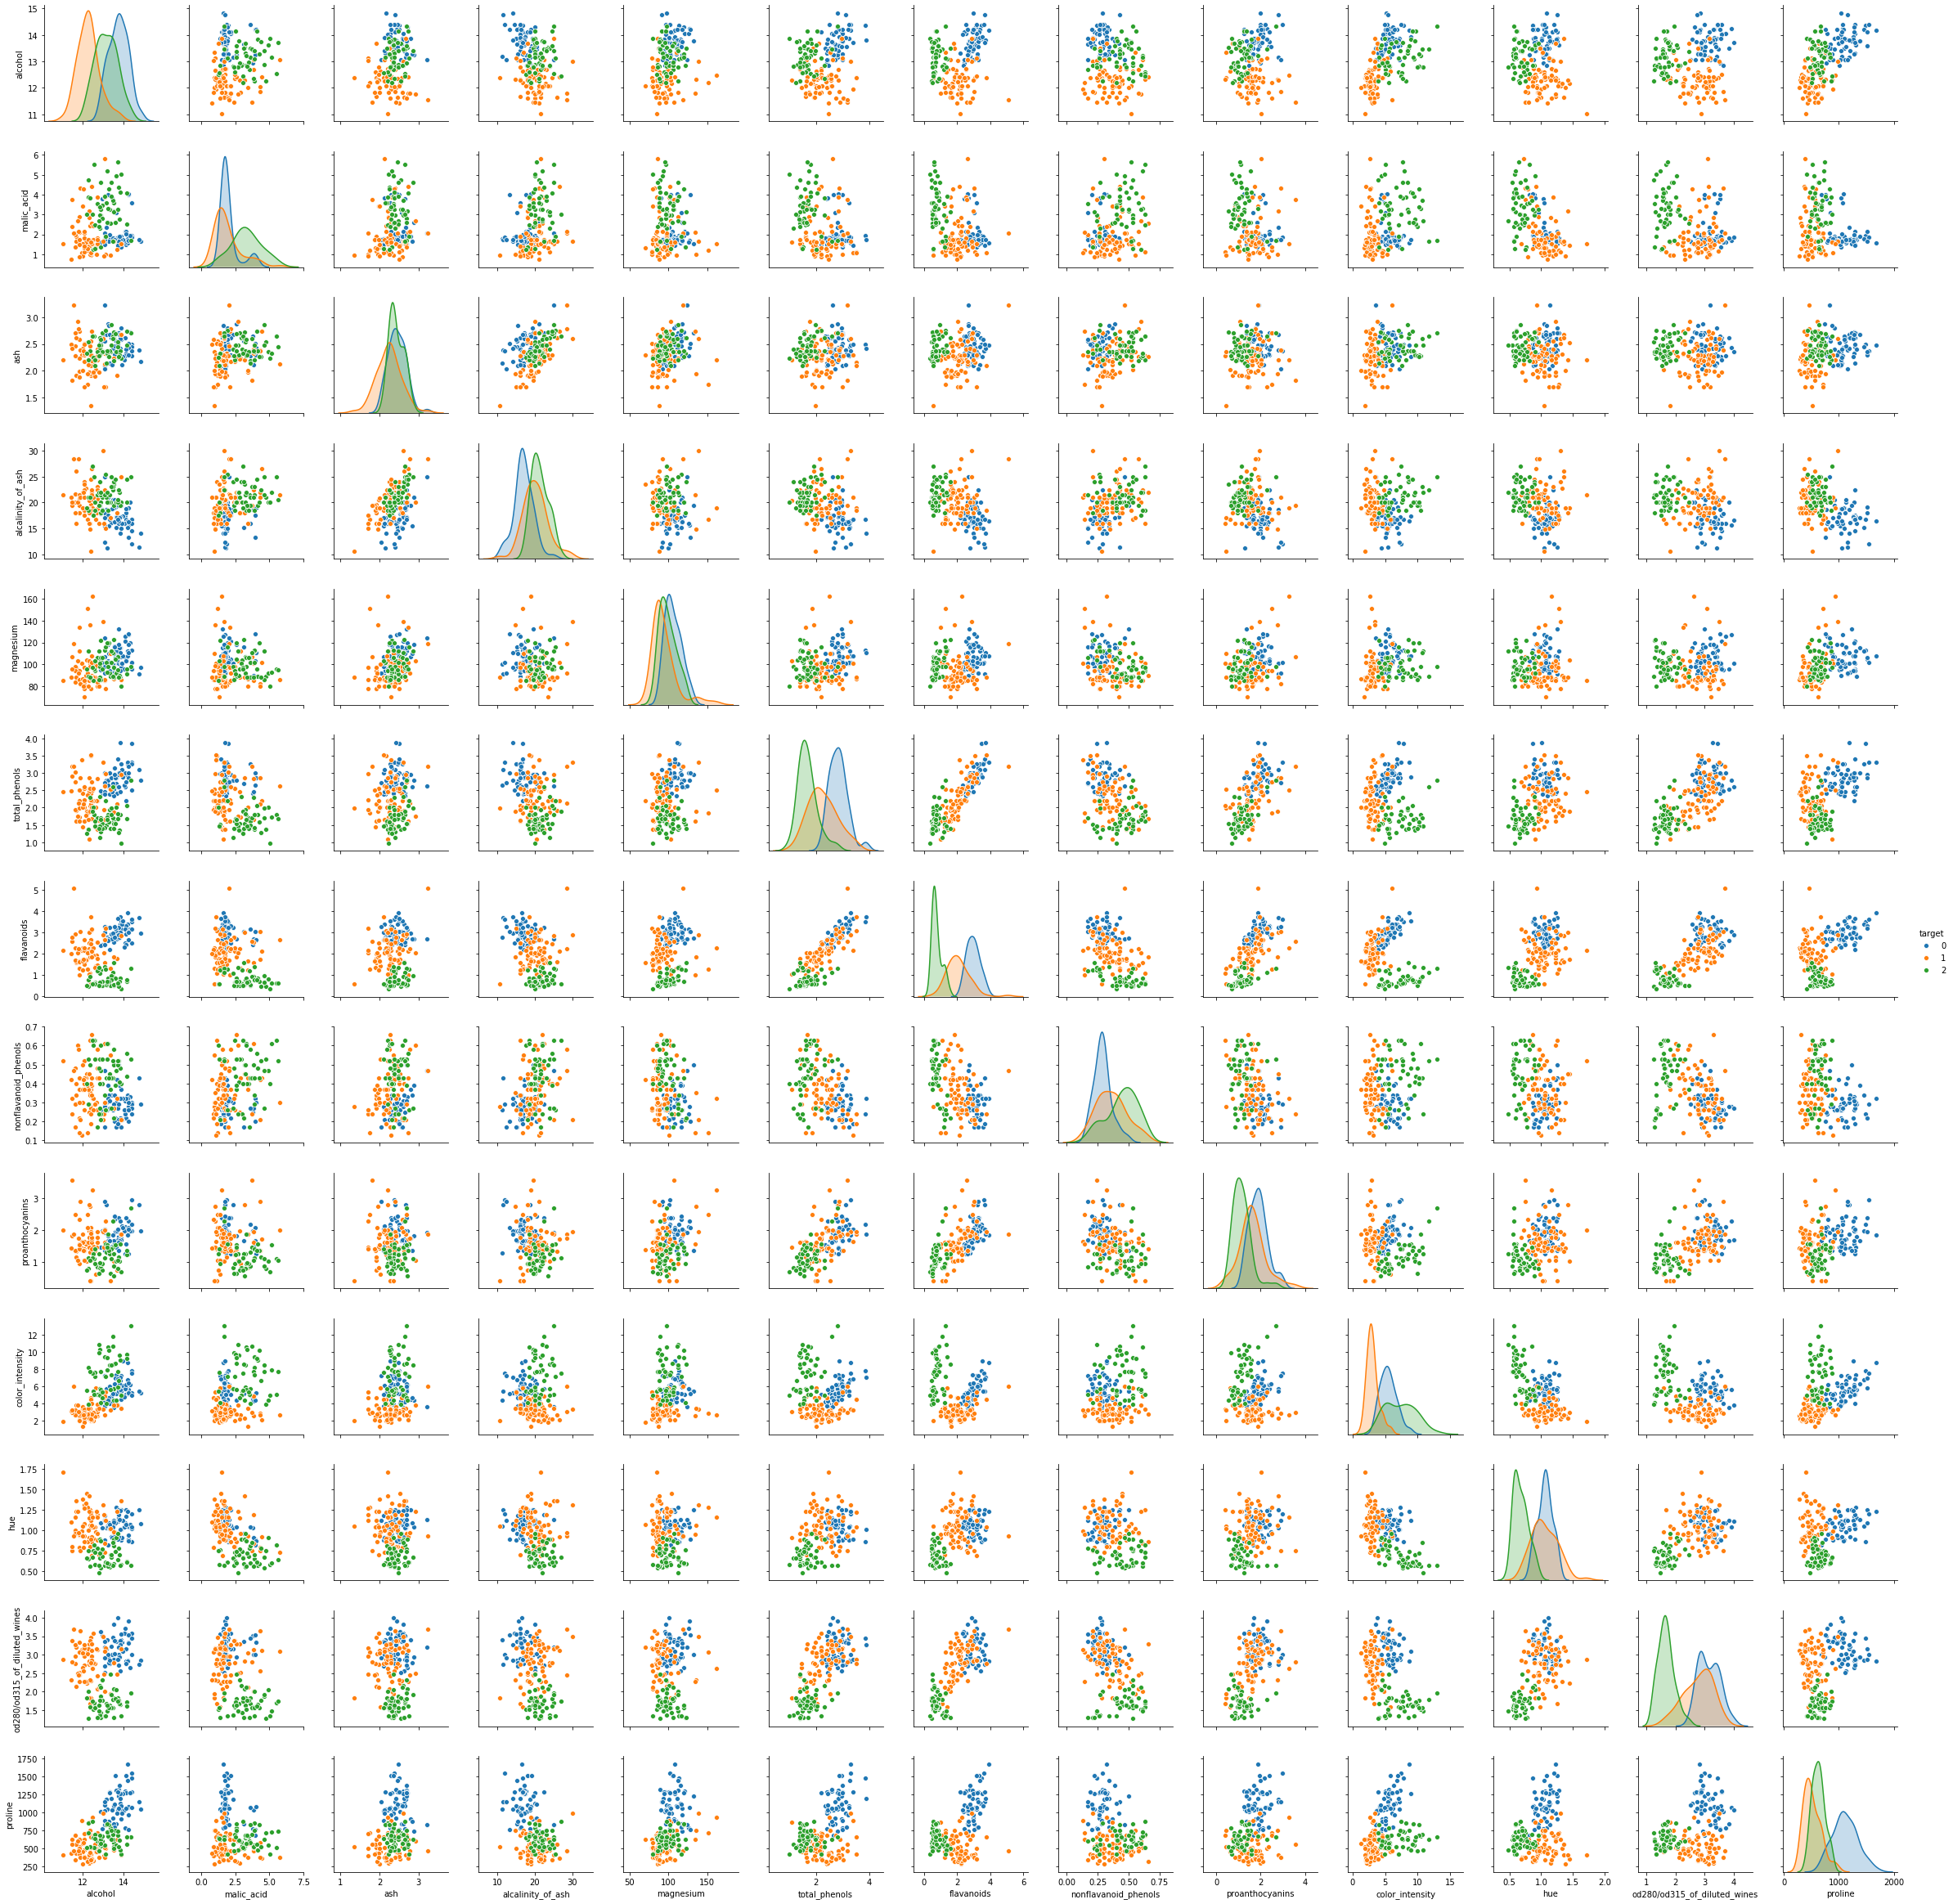

In [9]:
%matplotlib inline
sns.pairplot(wine, vars=feature_names.values, hue="target");

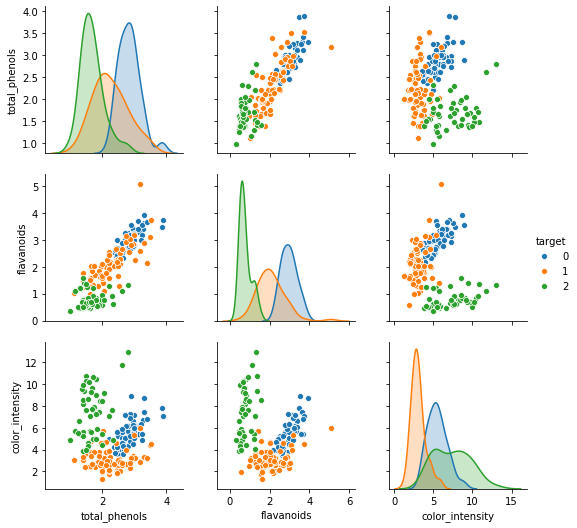

In [10]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids', 'color_intensity']
sns.pairplot(wine, vars=list_of_features, hue="target");

# Answer
## Observation of correlations

- There seems to be a linear correlation between the features "flavanoids" and "total_phenols" 
- Also there seems to be a linear correlation between the features "fLavanoids" and "od280/od315_of_diluted_wines"
- There seems to be a quadratic correlation between the features "flavanoids" and "color_intensity"

# Exercise 2
After digging into the depths of the data set of choice (or in question), the next step is to actually apply methods of <i>machine learning</i>. Otherwise, especially if data sets get more complex (and they <i>will</i>), manually analyzing them by downprojection and visualization is a bit of a hassle – and often do not lead to the desired results.

As discussed during the lecture, before applying <i>any</i> algorithm, it is best to separate some samples, which act as the <i>test set</i>. Ultimately, we want to test our trained model on <i>unseen</i> data. Your <b>first task</b> of this exercise requires you to perform the following steps:

- Split the <i>wine</i> data set in a way, so that the <i>test</i> set contains exactly $30$ samples.
- Train a <i>$k$-nearest neighbors classifier</i> using $k=1\ldots{}5$, step size of $1$.
- Print the respective score gathered by applying the fitted classifier on the <i>test set</i>.

Repeat the previous <i>three</i> steps multiple times, what do you observe?

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1685)

In [12]:
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1685)
    print(f"Repetition Nr. {n+1}:")
    for i in range(5):
        knn = KNeighborsClassifier(n_neighbors=(i+1))
        knn.fit(X_train, y_train)
        print(knn.score(X_test, y_test))
    print("\n")

Repetition Nr. 1:
0.7333333333333333
0.7
0.7
0.7
0.7


Repetition Nr. 2:
0.8
0.6
0.8
0.6333333333333333
0.7333333333333333


Repetition Nr. 3:
0.8333333333333334
0.6666666666666666
0.6666666666666666
0.7333333333333333
0.7


Repetition Nr. 4:
0.6666666666666666
0.6666666666666666
0.7333333333333333
0.7333333333333333
0.7333333333333333


Repetition Nr. 5:
0.7333333333333333
0.6666666666666666
0.7
0.7333333333333333
0.6666666666666666




# Answer
## Observations

The scores change everytime the 3 steps are repeated, they don't stay the same. This is because "train_test_split" splits the dataset randomly in 2 parts. The only given parameter is the size of those parts ("test_size"). So every time "train_test_split" is executed, the train- and test-set consists of different samples and therefore the Classifier is trained different everytime.

It would be interesting to know, how the <i>decision boundaries</i> of some specific combinations of features (with respect to the previous <i>correlation</i> analysis) look like. For this very purpose, use $k=3$ and display the decision boundaries of:

- ... <code>total_phenols</code> and <code>color_intensity</code>.
- ... <code>total_phenols</code> and <code>flavanoids</code>.
- ... <code>flavanoids</code> and <code>color_intensity</code>.

Are some combinations more suited to separate the data set than others?

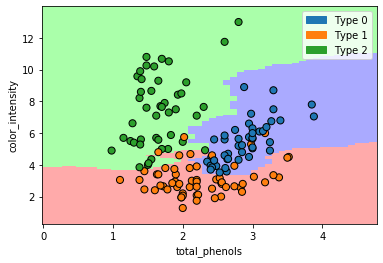

In [13]:
%matplotlib inline
list_of_features = ['total_phenols', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
knn = KNeighborsClassifier(n_neighbors=3)

u2.plot_wine_classifier(knn, X_train, y_train)

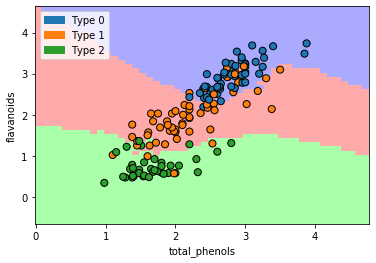

In [14]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
knn = KNeighborsClassifier(n_neighbors=3)

u2.plot_wine_classifier(knn, X_train, y_train)

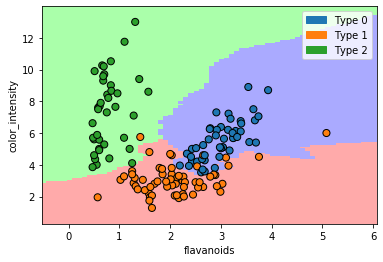

In [15]:
%matplotlib inline
list_of_features = ['flavanoids', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
knn = KNeighborsClassifier(n_neighbors=3)

u2.plot_wine_classifier(knn, X_train, y_train)

# Answer

In my opinion the combination 'total_phenols', 'color_intensity' is best suited to separate the data set, because the samples are not concentrated in a little area like at the combination 'total_phenols', 'flavanoids', but are spread across the whole graphic. Also they are clearly separeted in groups. The classifier separates exactly those groups. And because all the samples are spread across the whole graphic, it is less likely that the decision boundaries are the way they are just because of samples that are concentrated in a single small area. They can be seen as more general.

Before applying more complex <i>machine learning</i> methods, a short recapitulation of <i>underfitting</i> and <i>overfitting</i> might be quite appropriate. Given the following interesting function definition, the <i>Weierstrass function</i> (which is continuous, but <i>not</i> differentiable):

In [16]:
n_samples = 50
def function(x, b: float = 20):
    assert b >= 7
    a = (1 + ((3 * np.pi) / 2)) / b
    a *= 1.01
    assert 0 < a < 1
    return np.sum([np.power(a, n) * np.cos(np.power(b, n) * np.pi * x) for n in range(100)], axis=0)

Your <b>second task</b> of this exercise is to visualize the <i>Weierstrass function</i>
- <i>without</i> additional noise.
- <i>with</i> noise on the <code>y</code> vector (use a noise level of $0.12$).
- Fit the data points with a polynomial of degrees $n = \{1,6,30,150\}$.


What do you observe (with an emphasis on the boundaries of the visible function plot)? Is it even possible to fit the <i>original</i> function in a proper way? Moreover, experiment with the parameter <code>b</code> of the Weierstrass function, maybe <i>pretty high</i> values eases the fitting process.

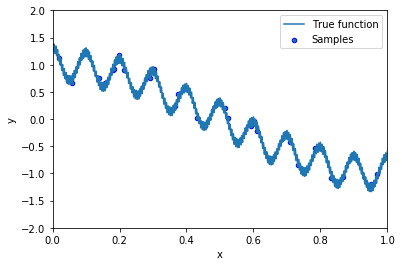

In [17]:
np.random.seed(42)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = function(X)

u2.plot_function(X, y, function)

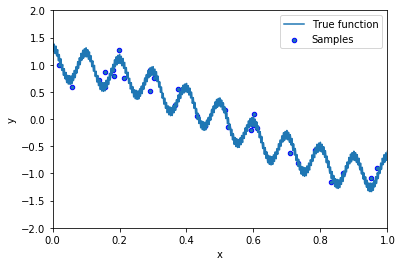

In [18]:
np.random.seed(42)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = function(X) + np.random.randn(n_samples) * 0.12

u2.plot_function(X, y, function)

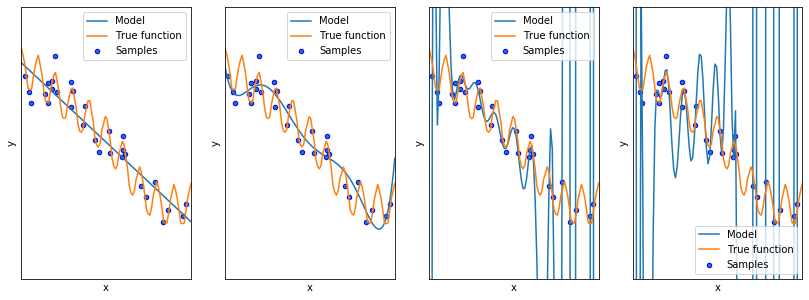

In [19]:
degrees = [1, 6, 30, 150]
u2.plot_function_fit(X, y, function, degrees)

# Answer
## Observations

On the one hand, the higher the degree of the polynomial function gets, the better it fits the samples, but also the more it goes beyond the boundaries of the true function. E.g. in plot 4 the peaks of the prediction-function are not even visible anymore. Overfitting is the case.

On the other hand, the lower the degree of the polynomial function gets, the more the prediction-function stays within the boundaries of the true function but the less samples it truly fits. E.g. in plot 1 the prediciton-function doesn't go beyond the boundaries of the true function at any point but also it goes through only one sample. Underfitting is the case.

It is necessary to find something inbetween over- and underfitting. A function, that, depending on one's own 'quality-standards' that are needed for a specific case, fits the original function as good as possible. A really perfect fit won't be possible, except the original function is also a polynomial function. If that is not the case and one is not happy with the 'polynomial fit', other ML-algorithms have to be used.

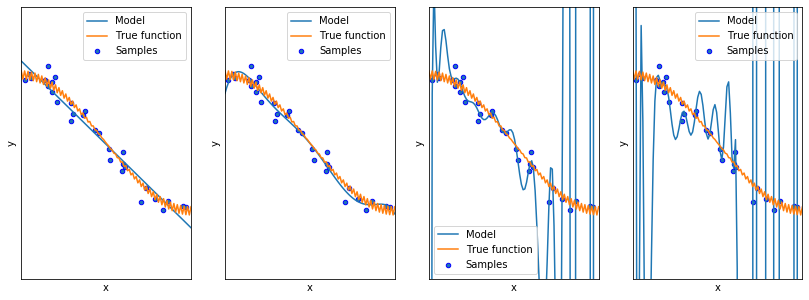

In [20]:
def function2(x, b: float = 100):
    assert b >= 7
    a = (1 + ((3 * np.pi) / 2)) / b
    a *= 1.01
    assert 0 < a < 1
    return np.sum([np.power(a, n) * np.cos(np.power(b, n) * np.pi * x) for n in range(100)], axis=0)

np.random.seed(42)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = function2(X) + np.random.randn(n_samples) * 0.12

degrees = [1, 6, 30, 150]
u2.plot_function_fit(X, y, function2, degrees)

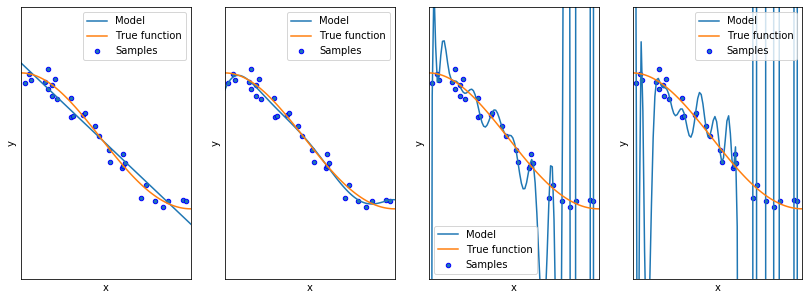

In [21]:
def function3(x, b: float = 200):
    assert b >= 7
    a = (1 + ((3 * np.pi) / 2)) / b
    a *= 1.01
    assert 0 < a < 1
    return np.sum([np.power(a, n) * np.cos(np.power(b, n) * np.pi * x) for n in range(100)], axis=0)

np.random.seed(42)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = function3(X) + np.random.randn(n_samples) * 0.12

degrees = [1, 6, 30, 150]
u2.plot_function_fit(X, y, function3, degrees)

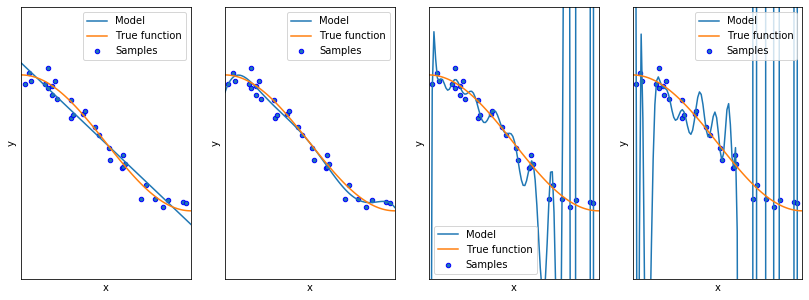

In [22]:
def function4(x, b: float = 20000):
    assert b >= 7
    a = (1 + ((3 * np.pi) / 2)) / b
    a *= 1.01
    assert 0 < a < 1
    return np.sum([np.power(a, n) * np.cos(np.power(b, n) * np.pi * x) for n in range(100)], axis=0)

np.random.seed(42)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = function4(X) + np.random.randn(n_samples) * 0.12

degrees = [1, 6, 30, 150]
u2.plot_function_fit(X, y, function4, degrees)

# Exercise 3
As the last exercise of this assignment, you will get your hands dirty by experimenting with more sophisticated machine learning methods. For this very purpose, your <b>first task</b> requires you the following steps:

- Train a <i>Naive Bayes</i> classifier on the <i>wine</i> data set using <i>all</i> features.
- Print the <i>score</i> of the trained classifier using the <i>training</i> as well as the <i>test</i> set.

In [23]:
feature_names = wine.columns[:-1]
X = wine[feature_names]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)

naive = GaussianNB()
naive.fit(X_train, y_train)

print('Wine dataset')
print('Accuracy of Gaussian Naive Bayes classifier on training set: {:.2f}'
      .format(naive.score(X_train, y_train)))
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'
      .format(naive.score(X_test, y_test)))

Wine dataset
Accuracy of Gaussian Naive Bayes classifier on training set: 0.98
Accuracy of Gaussian Naive Bayes classifier on test set: 1.00


It would be interesting to know, how the <i>decision boundaries</i> of some specific combinations of features (with respect to the previous <i>correlation</i> analysis of <i>exercise 2</i>) look like. For this very purpose, apply <i>Naive Bayes</i> and display the decision boundaries of:

- ... <code>total_phenols</code> and <code>color_intensity</code>.
- ... <code>total_phenols</code> and <code>flavanoids</code>.
- ... <code>flavanoids</code> and <code>color_intensity</code>.

Are some combinations more suited to separate the data set than others?

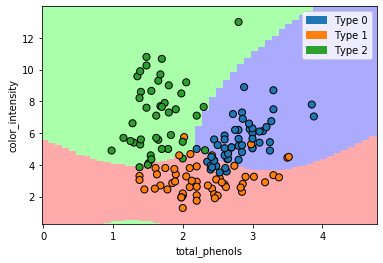

In [24]:
%matplotlib inline
list_of_features = ['total_phenols', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
naive = GaussianNB()

u2.plot_wine_classifier(naive, X_train, y_train)

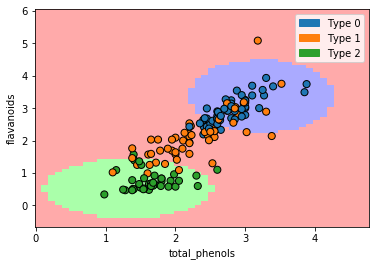

In [25]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
naive = GaussianNB()

u2.plot_wine_classifier(naive, X_train, y_train)

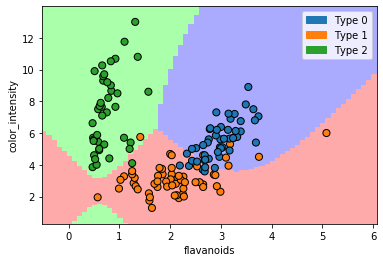

In [26]:
%matplotlib inline
list_of_features = ['flavanoids', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
naive = GaussianNB()

u2.plot_wine_classifier(naive, X_train, y_train)

# Answer

In my opinion the combination 'total_phenols', 'color_intensity' seems to be the best for seperation of the data because there are three clearly distinguishable areas for each class. 

The same is the case for the combination 'total_phenols', 'flavanoids', but both the green and blue ellipse are relativly small. So the risk that a sample for e.g. Type 0 has a very little bit higher value for 'flavanoids' and promptly lands in the red area is increased.

With the combination 'flavanoids', 'color_intensity' there is a little green area in the bottom left within the greater red area. This makes a clear seperation of the data harder.

Your <b>second task</b> is pretty similar to the first of this exercise, with the difference of applying a <i>Random Forest</i> instead of a <i>Naive Bayes</i> classifier.

- Train a <i>Random Forest</i> classifier on the <i>wine</i> data set using <i>all</i> features.
- Print the <i>score</i> of the trained classifier using the <i>training</i> as well as the <i>test</i> set.

In [27]:
feature_names = wine.columns[:-1]
X = wine[feature_names]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

print('Wine dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
      .format(forest.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
      .format(forest.score(X_test, y_test)))

Wine dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.93


Again, it would be interesting to know, how the <i>decision boundaries</i> of some specific combinations of features (with respect to the previous <i>correlation</i> analysis of <i>exercise 2</i>) look like. For this very purpose, apply <i>Random Forest</i> and display the decision boundaries of:

- ... <code>total_phenols</code> and <code>color_intensity</code>.
- ... <code>total_phenols</code> and <code>flavanoids</code>.
- ... <code>flavanoids</code> and <code>color_intensity</code>.

Are some combinations more suited to separate the data set than others? Experiment with different hyperparameter settings.

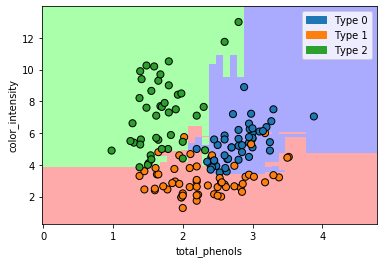

In [28]:
%matplotlib inline
list_of_features = ['total_phenols', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
forest = RandomForestClassifier()

u2.plot_wine_classifier(forest, X_train, y_train)

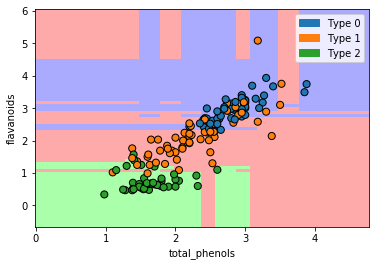

In [29]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
forest = RandomForestClassifier()

u2.plot_wine_classifier(forest, X_train, y_train)

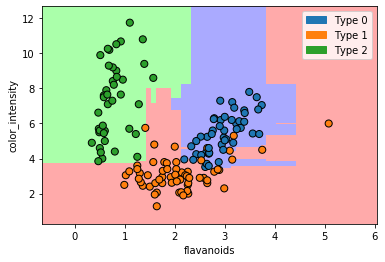

In [30]:
%matplotlib inline
list_of_features = ['flavanoids', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
forest = RandomForestClassifier()

u2.plot_wine_classifier(forest, X_train, y_train)

# Answer

In my opinion the best combination for seperating the data is 'flavanoids', 'color_intensity', because there are three clear, relativly big areas for every class. They are very well demarcated (I mean 'abgegrenzt') from each other.

The combinations 'total_phenols', 'flavanoids' and 'total_phenols', 'color_intensity' do not have that clear decision boundaries, so they are not as well suited for seperating the data as the previously mentioned combination.

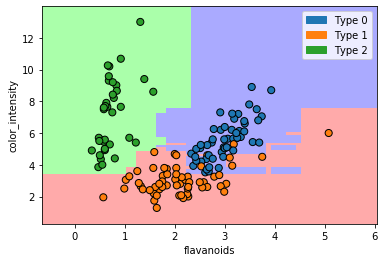

In [31]:
# Experimentation with hyperparameters

%matplotlib inline
list_of_features = ['flavanoids', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
forest = RandomForestClassifier(n_estimators=20, max_leaf_nodes=45, bootstrap=False, max_depth=200)

u2.plot_wine_classifier(forest, X_train, y_train)

As the <b>third task</b> of this exercise, you are required to experiment with <i>XGBoost</i> by following these steps:

- Train an <i>XGBoost</i> classifier on the <i>wine</i> data set using <i>all</i> features.
- Print the <i>score</i> of the trained classifier using the <i>training</i> as well as the <i>test</i> set.

In [32]:
feature_names = wine.columns[:-1]
X = wine[feature_names]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)

xgb = XGBClassifier(max_depth=7,
                        min_child_weight=1,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=True,
                        objective='binary:logistic',
                        gamma=0,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        seed=1,
                        missing=None)

xgb.fit(X_train, y_train)

print('Wine dataset')
print('Accuracy of XGBoost classifier on training set: {:.2f}'
      .format(xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
      .format(xgb.score(X_test, y_test)))

Wine dataset
Accuracy of XGBoost classifier on training set: 1.00
Accuracy of XGBoost classifier on test set: 1.00


As for the previous methods, it would be interesting to know, how the <i>decision boundaries</i> of some specific combinations of features (with respect to the previous <i>correlation</i> analysis of <i>exercise 2</i>) look like. For this very purpose, apply <i>XGBoost</i> and display the decision boundaries of:

- ... <code>total_phenols</code> and <code>color_intensity</code>.
- ... <code>total_phenols</code> and <code>flavanoids</code>.
- ... <code>flavanoids</code> and <code>color_intensity</code>.

Are some combinations more suited to separate the data set than others? Experiment with different hyperparameter settings.

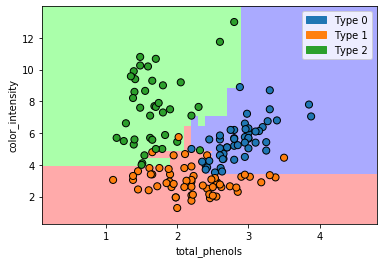

In [33]:
%matplotlib inline
list_of_features = ['total_phenols', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
xgb = XGBClassifier(max_depth=7,
                        min_child_weight=1,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=True,
                        objective='binary:logistic',
                        gamma=0,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        seed=1,
                        missing=None)

u2.plot_wine_classifier(xgb, X_train, y_train)

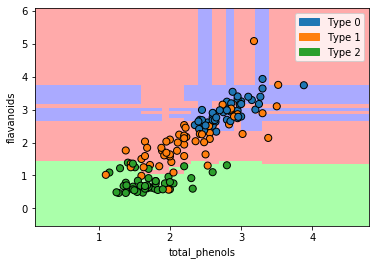

In [34]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
xgb = XGBClassifier(max_depth=7,
                        min_child_weight=1,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=True,
                        objective='binary:logistic',
                        gamma=0,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        seed=1,
                        missing=None)

u2.plot_wine_classifier(xgb, X_train, y_train)

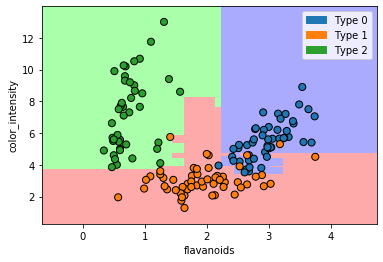

In [35]:
%matplotlib inline
list_of_features = ['flavanoids', 'color_intensity']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
xgb = XGBClassifier(max_depth=7,
                        min_child_weight=1,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=True,
                        objective='binary:logistic',
                        gamma=0,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        seed=1,
                        missing=None)

u2.plot_wine_classifier(xgb, X_train, y_train)

# Answer

In my opinion the combination 'total_phenols', 'flavanoids' is the least suited for seperating the data because of the unclear boundaries between Type 0, Type 1 and Type 2. E.g. there are a few very slim, red rectangles protuding into the big green area or blue rectangles protuding into the red area.

This is not (that much) the case with combinations 'flavanoids', 'color_intensity' and 'total_phenols', 'color_intensity', so I think those two are suited the best for seperating the data.

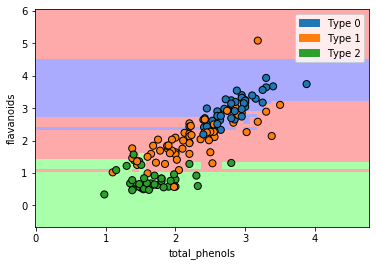

In [36]:
# Experimentation with hyperparameters

%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids']

X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1685)
xgb = XGBClassifier(max_depth=300,
                        min_child_weight=0.3,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=False,
                        objective='binary:logistic',
                        gamma=1,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        seed=1,
                        missing=None)

u2.plot_wine_classifier(xgb, X_train, y_train)

The <b>last task</b> of this exercise requires you to discuss differences between the results of all three machine learning methods, applied onto the wine data set. As some hints for getting started, emphasize – among others – the following things:

- Performance on <i>training</i> as well as <i>test</i> set.
- Differences in the <i>decision boundaries</i>, especially between <i>Random Forest</i> and <i>XGBoost</i>.

Moreover, as at the beginning of this assignment, we won't give you a description of the data sets you are analyzing, so you are required to get more familiar with it on your own. For curious minds, more information is available at:

<cite>Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499.</cite>

In order to achieve this, perform the following steps:

- Load the <i>diabetes</i> data set.
- Look at the <i>first</i> seven samples of the data set.

Are you dealing with a <i>classification</i> or <i>regression task</i> data set?

# Answer
## Discussion of the differences between the results of three machine learning methods, applied onto the wine data set

The performances on the training set and on the test set are pretty good for every one of the three ML-algorithms. There are only very little differences, every value is pretty near to 1.00. Differences are in the tenth-area (I mean 'Zehntel-Bereich'). A focus on the small differences of a few tenths or hundreths between the accuracy values of each ML-method is not that useful because thoses values are changing sligtly in the tenth-area with every repetition of the code-block. This is because of the randomness within "train_test_split", so the specific value of the tens digit is more or less random. Therefore focusing on exactly those is not useful.

Bigger differences between the three ML-algorithms can be found with respect to the decision boundaries. The decision boundaries at the Naive Bayes classifier are very smooth and round, whereas the boundaries at both the Random Forest classifier and the XGBoost classifier are more or less strict, hard lines. This lies in the nature of the different classifiers. XGBoost and Random Forest are creating numerous decision trees. Those decision trees are built from various "questions" to the data for which the answer always is only "yes" or "no", nothing inbetween. Therefore as a result, the decision boundaries of XGBoost and Random Forest are very hard. Naive Bayes on the other hand uses a mathematical formula to calculate the class of a sample. There is not only "yes" or "no" as it is the case with the previous classifiers. So the decision boundaries are smoother.

A difference between the decision boundaries of the Random Forest classifier and the XGBoost classifier are not that well recognisable on first sight. Both are strict lines and hard boundaries. This is because they both combine a number of decision trees. Looking closer, differences are becoming visible. E.g. the decision boundries of the XGBoost are clearer than those of the Random Forest. The different classes are better distinguishable. But also the class-areas themselves are a little bit different. E.g. for the combination 'total_phenols', 'flavanoids' the XGBoost splits the data in more or less three horizontal, superimposed (I mean "übereinanderliegend") layers, whereas the Random Forest not only splits horizontally but also vertically. Moreover the class-areas of the Random Forest for that combination seem a little bit more random than those of the XGBoost. For the combination 'total_phenols', 'color_intensity' both the Random-Forest-class-areas and the XGBoost-class-areas are more or less the same. For the combination 'flavanoids', 'color_intensity' both algorithms are again a little bit different with respect to the class-areas.

In my eyes it also seems like the XGBoost is a little bit less mislead by outliers (I mean "Ausreißer"). This can be seen by comparing the XGBoost decision boundaries and the Random Forest boundaries with respect to the combination 'total_phenols', 'flavanoids': The XGBoost divides the space in three superimposed, rectangleish layers with the top layer being blue even though there are some red samples nearly in the upper right corner. The Random Forest on the other hand creates, I assume because of especially those samples, a red area in the upper right, even though there are only 2 red samples there.

In [37]:
diabetes = u2.load_diabetes()
diabetes[:7]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0


In [38]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


# Answer

This case is a regression task because in the 'target'-column there are only different floats, whereas at a classification task those 'target'-values would be integers and also probably more of them would be the same. 

Additionally, apply <i>XGBoost</i> on the newly loaded data set and observe the development of both, the <i>training</i> as well as the <i>test</i> error. To achieve this, perform the following steps:

- Split the <i>diabetes</i> data set in a way, so that the <i>test</i> set contains exactly $45$ samples.
- Display development of <i>training</i> and <i>test</i> errors with respect to <i>XGBoost</i>.

Can you observe <i>underfitting</i>/<i>overfitting</i> (default hyperparameter settings, except the <i>objective</i>)?

[0]	test-rmse:129.792	train-rmse:125.325
[1]	test-rmse:103.144	train-rmse:94.5341
[2]	test-rmse:82.5375	train-rmse:72.6115
[3]	test-rmse:73.2311	train-rmse:57.011
[4]	test-rmse:64.9198	train-rmse:45.9899
[5]	test-rmse:60.7134	train-rmse:38.9182
[6]	test-rmse:57.0727	train-rmse:33.549
[7]	test-rmse:57.1313	train-rmse:30.0646
[8]	test-rmse:56.2812	train-rmse:26.7785
[9]	test-rmse:55.3497	train-rmse:24.3388
[10]	test-rmse:55.0548	train-rmse:23.0463
[11]	test-rmse:55.6314	train-rmse:20.7735
[12]	test-rmse:55.4148	train-rmse:19.5028
[13]	test-rmse:55.8601	train-rmse:18.4097
[14]	test-rmse:55.5879	train-rmse:17.3005
[15]	test-rmse:55.3193	train-rmse:16.325
[16]	test-rmse:55.4088	train-rmse:15.996
[17]	test-rmse:54.9845	train-rmse:15.5275
[18]	test-rmse:54.8021	train-rmse:15.2492
[19]	test-rmse:54.6994	train-rmse:14.5793
[20]	test-rmse:54.6477	train-rmse:14.0631
[21]	test-rmse:55.1582	train-rmse:12.9317
[22]	test-rmse:55.681	train-rmse:11.8962
[23]	test-rmse:55.54	train-rmse:11.0563
[24]	test

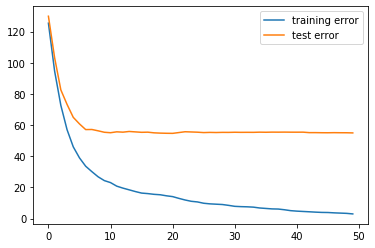

In [39]:
feature_names = diabetes.columns[:-1]
X = diabetes[feature_names]
y = diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1018)

dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror'
}

u2.watch_training_test_error(dtrain, dtest, params, num_boost_rounds=50)

# Answer
## Over- or Underfitting?

I think that this is a case of overfitting. One can see on the one hand that the training error nearly drops to 0, so the model can predict nearly every sample of the training set correctly. On the other hand the test error stays at around 60/70. The values for diabetes['target'] are spreaded from 25 to 346, so a test error of 70 is relativly high at that scale. 

A high test error and a very low training error point to the fact that the ML-model is perfectly fitted to the training set. Practically it learned every sample of this set by heart. But this means, that the ML-model is unsuitable to be used on "new" data, like the test set. Therefore the test error is high. So we have a case of overfitting. 